In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

# NLTK 자연어 처리 패키지

- Natural Language ToolKit 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지

**주요기능**
- 말뭉치 : 자연어 분석을 위해 만든 샘플 문서의 집합을 뜻함.
- 토큰 생성 : 긴 문자열을 분석을 위한 작은 단위로 나누는 것
- 형태소 분석 : 언어학에서는 일정한 의미가 있는 가장 작은 말의 단위
 - 어간 추출(stemming)
 - 원형 복원
- 품사 태깅(POS , part_of speech)

In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('book' , quiet = True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
# 저작권이 만료된 문학작품을 포함한 말뭉치 gutenberg
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
emma_row = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_row[:1300])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

## 토큰 생성
- 정규표현식 : 문장 , 단어 , 글자단위

In [7]:
from nltk.tokenize import sent_tokenize

In [12]:
print(sent_tokenize(emma_row[:1300])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [13]:
from nltk.tokenize import word_tokenize

In [29]:
print(word_tokenize(emma_row[:1300][50:100]))

['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [30]:
from nltk.tokenize import RegexpTokenizer

In [37]:
# 숫자와 영문자만 뽑아내기
pat = RegexpTokenizer('[\w]+')
pat.tokenize(emma_row[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## 형태소 분석

- 자연어 처리에서는 토큰으로 형태소를 이용
- 형태소 분석 : 단어로부터 어근 , 접두사 , 접미사 , 품사 등 다양한 언어의 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리
- 어간 추출 -> 단어의 기본형
- 원형 복원 -> 시제를 가지고 있는 단어의 어간을 찾아주는 작업

In [41]:
#어간추출
from nltk.stem import PorterStemmer , LancasterStemmer

s1 = PorterStemmer()
s2 = LancasterStemmer()

words = ['fly','files','flying','flew','flown']

print('Porter : ' , [s1.stem(w) for w in words])
print('Lancaster : ' , [s2.stem(w) for w in words])

Porter :  ['fli', 'file', 'fli', 'flew', 'flown']
Lancaster :  ['fly', 'fil', 'fly', 'flew', 'flown']


In [47]:
#원형복원
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()
print([lm.lemmatize(w , pos = 'v') for w in words])

['fly', 'file', 'fly', 'fly', 'fly']


## 품사 부착(POS)
- 품사 : 단어와 문법적인 기능이나 형태 , 뜻으로 구분하는 것
- NNP : 단수 고유명사
- VB : 동사
- VBP : 동사 현재형
- TO : 전치사
- NN : 명사(단수 or 복수)
- DT : 관용사

In [49]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [51]:
#pos_tag() : 단어 토큰에 품사를 부착하여 튜플로 추출
from nltk.tag import pos_tag
sentence = 'Emma refused to permit us to obtain the refuse permit'

tag_list = pos_tag(word_tokenize(sentence))
tag_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [53]:
#분석할 품사를 선택해서 해당 품사의 토큰만 추출
nouns_list = [t[0] for t in tag_list if t[1] == 'NN']
nouns_list

['refuse', 'permit']

In [62]:
#untag() : pos_tag에서 품사를 제거하고 추출

from nltk.tag import untag

untag(tag_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [68]:
def tokenizer(doc):
    return ['/'.join(p) for p in tag_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

# KoNLPy : 한국어 처리 패키지

In [73]:
!pip install konlpy

     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
      --------------------------------------- 0.4/19.4 MB 11.2 MB/s eta 0:00:02
     --- ------------------------------------ 1.6/19.4 MB 17.2 MB/s eta 0:00:02
     -------- ------------------------------- 4.0/19.4 MB 32.0 MB/s eta 0:00:01
     ------------ --------------------------- 6.0/19.4 MB 31.9 MB/s eta 0:00:01
     ----------------- ---------------------- 8.6/19.4 MB 36.5 MB/s eta 0:00:01
     -------------------- ------------------ 10.4/19.4 MB 40.9 MB/s eta 0:00:01
     -------------------------- ------------ 13.1/19.4 MB 46.9 MB/s eta 0:00:01
     ------------------------------ -------- 15.3/19.4 MB 50.4 MB/s eta 0:00:01
     ----------------------------------- --- 17.8/19.4 MB 54.7 MB/s eta 0:00:01
     --------------------------------------  19.4/19.4 MB 50.4 MB/s eta 0:00:01
     --------------------------------------- 19.4/19.4 MB 40.9 MB/s eta 0:00:00
     ---------------------------------------- 0.

## 한국어 말뭉치
- 대한민국 헌법 말뭉치 kolaw
- 국회법안 말뭉치 kobill
- 말뭉치 파일 리스트 filelds

In [78]:
from konlpy.corpus import kolaw

kolaw.fileids()

['constitution.txt']

In [79]:
c = kolaw.open('constitution.txt').read()
print(c)

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.
  제8조 ① 정당의 설립은 자유이며, 복수정당제

In [81]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [84]:
d = kobill.open('1809891.txt').read()
print(d)

국가공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9891

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제71조제2항제4호).

- 1 -

법률  제        호

국가공무원법 일부개정법률안

국가공무원법 일부를 다음과 같이 개정한다.

제71조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 

8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”

로 한다.

부      칙

이 법은 공포한 날부터 시행한다.

- 3 -

신 ·구조문대비표

현      행

개   정   안

제71조(휴직) ① (생  략)

제71조(휴직) ① (현행과 같음)

  ② 임용권자는 공무원이 다음 
  ② -------------------------

각 호의 어느 하나에 해당하는 

----------------------------

사유로 휴직을 원하면 휴직을 

----------------------------

명할 수 있다. 다만, 제4호의 

-------------.---------------

경우에는 대통령령으로 정하는 

----------------------------

특별한 사정이 없으면 휴직을 

----------------------------

명하여야 한다.

--------------.

  1. ∼ 3. 

## 형태소 분석
- hannanum : 한나눔
- kkma : 꼬꼬마
- Open Korean text : 오픈소스 한국어 분석기(구 , 트위터 형태소 분석기)

In [85]:
from konlpy.tag import *

# 나이브베이스
- 베이즈 정리를 기반으로 한 통계적 분류 기법
- 가장 단순한 지도학습 알고리즘
- 나이브 베이스 분류기는 빠르고 정확하며 믿을만한 알고리즘
- 정확도가 높고 대용량 데이터에 대해 속도가 빠르다.
- 각 feature끼리 서로 독립이라는 조건이 필요

In [99]:
data = pd.read_csv('https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv')
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 문제 정의 : 스팸 여부 판단

- 문자 데이터셋을 이용하여 스팸 여부를 판단하는 문제
- 독립변수(text)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [103]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [104]:
data.target.value_counts()

ham     4827
spam     747
Name: target, dtype: int64

- 편향이 심함

## 전처리

### 특수문자 제거

In [111]:
import string
# punctuation : 특수문자기호목록
st = string.punctuation

In [108]:
sample = data['text'].loc[0]

In [109]:
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [121]:
def remove_punc(sample):
    new_string = []

    for i in sample:
        if i in st:
            continue
        else:
            new_string.append(i)
    new_string = ''.join(new_string)
    return new_string

In [122]:
data.text = data.text.apply(remove_punc)
data.text

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

### 불용어 제거
- 자연어 분석에서 큰 의미를 두지 않는 단어 제거

In [123]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NT551_11TH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [127]:
#불용어 사전( 영어 )
from nltk.corpus import stopwords
no = stopwords.words('english')

In [125]:
sample = data['text'].loc[0]
sample

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [126]:
#작은 단위 : 토큰 , 단어단위

sample.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [129]:
#capitalize() : 첫 글자만 대문자로 변환
def stop_word(x):
    new_string = []
    for w in x.split():
        if w.lower() not in no:
            new_string.append(w.lower())
            
    new_string = ' '.join(new_string)
    return new_string

In [130]:
data.text = data.text.apply(stop_word)
data.text

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

In [131]:
data.target = data.target.map({'spam' : 1 , 'ham' : 0})
data.target

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

### text 피처 값을 벡터로 변환
- 카운트 기반 벡터화 : 문자를 정수 기반으로 벡터화하는 형식
- 데이터 전체에 존재하는 모든 문자를 사진처럼 모은 뒤에 고유 인덱스를 부여하고 , 문자마다 속한 단어가 있는 인덱스를 카운트하는 방식

In [142]:
x = data['text']
y = data['target']

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

cv.fit(x)

CountVectorizer()

In [144]:
x = cv.transform(x)

In [146]:
print(x)

  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


In [150]:
data.loc[0].text

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [152]:
#고유 인덱스 추출

print(cv.vocabulary_['go'])
print(cv.vocabulary_['jurong'])
print(cv.vocabulary_['point'])

3791
4687
6433


# 모델링

## 훈련 세트와 테스트 세트로 분리

In [153]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 100 , stratify = y)

**사이킷런에서 제공하는 나이브베이스 모형들**
- 가우시안 정규분포(GaussionNB)
- 베르누이 분포(BernoulliNB)
- 다항분포(MultinomialNB

In [157]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train , y_train)
print(nb.score(x_train , y_train))
print(nb.score(x_test , y_test))

0.9943933617403005
0.9748878923766816


In [158]:
pred = nb.predict(x_test)

In [159]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score

confusion_matrix(y_test , pred)

array([[947,  19],
       [  9, 140]], dtype=int64)

<Axes: >

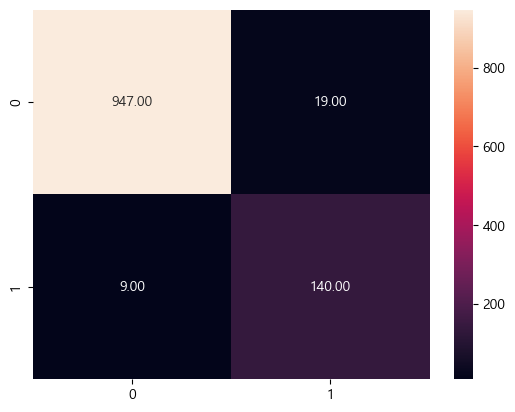

In [162]:
sns.heatmap(confusion_matrix(y_test , pred) , annot = True , fmt=".2f")

In [163]:
precision_score(y_test , pred)

0.8805031446540881

In [164]:
recall_score(y_test , pred)

0.9395973154362416